# HW5
Bruno Morgado<br>
RIN: 661995422

Question 1: Convolutional Neural Network

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

import numpy as np
from skimage import io
from matplotlib import pyplot as plt  
import copy

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

Splitting data

In [9]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("x shape:",x_train.shape)

# Convert the target data into one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


x shape: (50000, 32, 32, 3)


Setting up model

In [10]:
# CNN model
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2),  strides=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),  strides=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          9248      
                                                                 
 flatten (Flatten)           (None, 512)             

Training Model and plotting results

Epoch 1/10


547/547 [==============================] - 15s 24ms/step - loss: 2.2902 - accuracy: 0.1858 - val_loss: 1.8536 - val_accuracy: 0.3097
Epoch 2/10
547/547 [==============================] - 14s 25ms/step - loss: 1.7229 - accuracy: 0.3639 - val_loss: 1.6206 - val_accuracy: 0.4024
Epoch 3/10
547/547 [==============================] - 13s 24ms/step - loss: 1.5468 - accuracy: 0.4347 - val_loss: 1.4976 - val_accuracy: 0.4564
Epoch 4/10
547/547 [==============================] - 12s 23ms/step - loss: 1.4419 - accuracy: 0.4768 - val_loss: 1.4570 - val_accuracy: 0.4749
Epoch 5/10
547/547 [==============================] - 12s 22ms/step - loss: 1.3588 - accuracy: 0.5115 - val_loss: 1.5013 - val_accuracy: 0.4647
Epoch 6/10
547/547 [==============================] - 12s 23ms/step - loss: 1.3008 - accuracy: 0.5308 - val_loss: 1.3507 - val_accuracy: 0.5183
Epoch 7/10
547/547 [==============================] - 13s 23ms/step - loss: 1.2472 - accuracy: 0.5525 - val_loss: 1.4098 - val_accurac

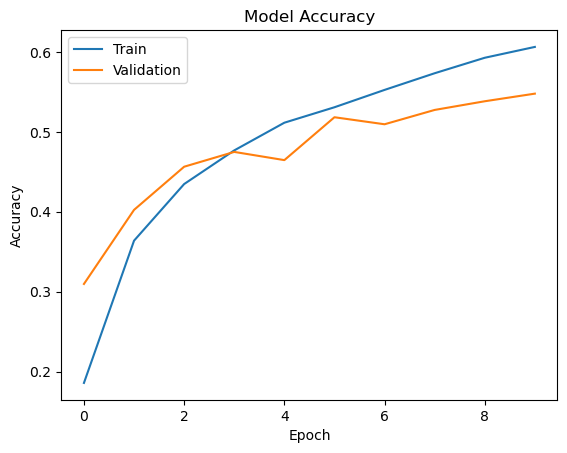

In [11]:
# Train model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.3)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Question 2 SVM:<br> Importing and wrangling data

In [35]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
print(data['data'])
print(data['target'])

desired_features = ['worst area', 'worst compactness', 'worst concavity']
desired_feature_indeces = []
for feature in desired_features:
   bool = data['feature_names']==feature

   desired_feature_indeces.append([i for i, val in enumerate(bool) if val][0])

print(desired_feature_indeces)

X = np.array(data['data'][:,desired_feature_indeces])

print(X.shape)

y = np.array(data['target'])
print(y.shape)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

Splitting data

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.30,
    train_size=0.70,
    random_state=420,
    shuffle=True,
    stratify=y)



accuracy score : 0.8830409356725146


Linear model

In [37]:
#Importing the SVM
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn import svm

#Training SVM
svm_clf = Pipeline([ ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge"))])
svm_clf.fit(X_train, y_train)

#Extracting data from prodicted
preds = svm_clf.predict(X_test)

#Evaluate 
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,preds)
print('accuracy score :', acc)

accuracy score : 0.9473684210526315


c:\Users\MorgadoBruno\AppData\Local\anaconda3\envs\ML\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Radial model

In [39]:
from sklearn.svm import SVC
#Training SVM
svm_clf_radial = Pipeline([ ("scaler", StandardScaler()),
        ('svc', SVC(C=2, kernel='rbf'))])
svm_clf_radial.fit(X_train, y_train)

#Extracting data from prodicted
preds = svm_clf_radial.predict(X_test)

#Evaluate 
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,preds)
print('accuracy score :', acc)

accuracy score : 0.935672514619883


The linear model has a slightly higher accuracy score given these hyper parameters.